In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\Python_Diwali_Sales_Analysis\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv',encoding='unicode_escape')


In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop unrelated/blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
#check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
#drop null values
df.dropna(inplace=True)

In [9]:
df.shape

(11239, 13)

In [10]:
#change data type
df['Amount']=df['Amount'].astype(int)

In [11]:
#Use describe() for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis


### Gender


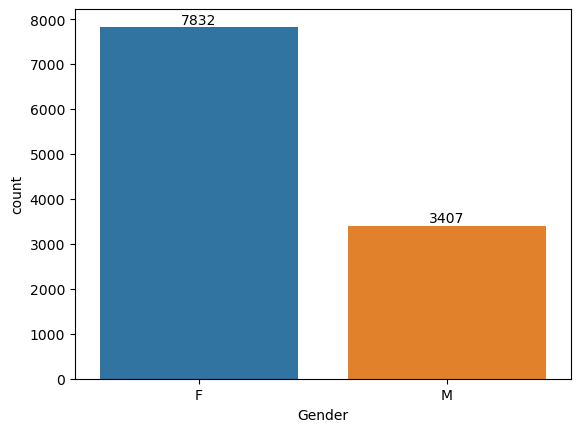

In [12]:
# plotting a bar chart for Gender and it's count
ax=sns.countplot(x='Gender',data=df)
ax.bar_label(ax.containers[0])
plt.show()

<Axes: xlabel='Gender', ylabel='Amount'>

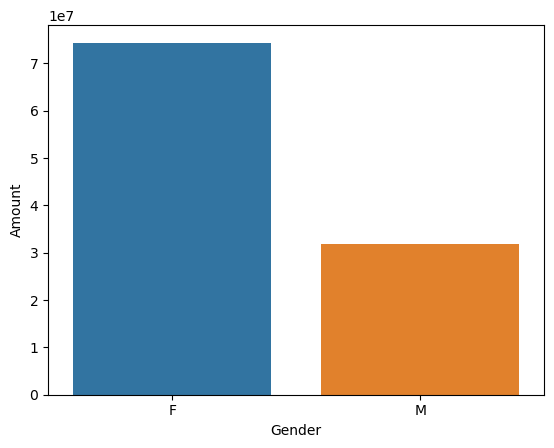

In [14]:
# plotting a bar chart for gender vs total amount
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

###### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

### Age

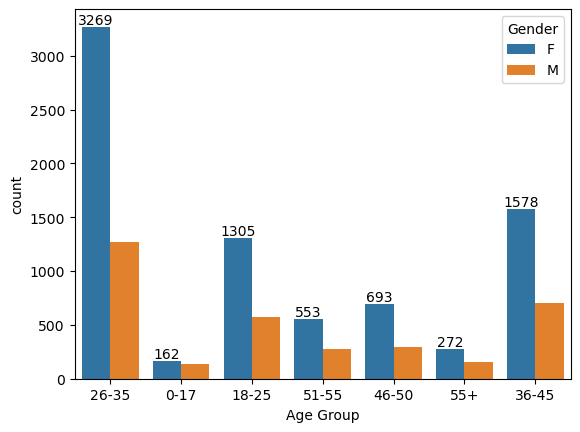

In [13]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
ax.bar_label(ax.containers[0])
plt.show()

<Axes: xlabel='Age Group', ylabel='Amount'>

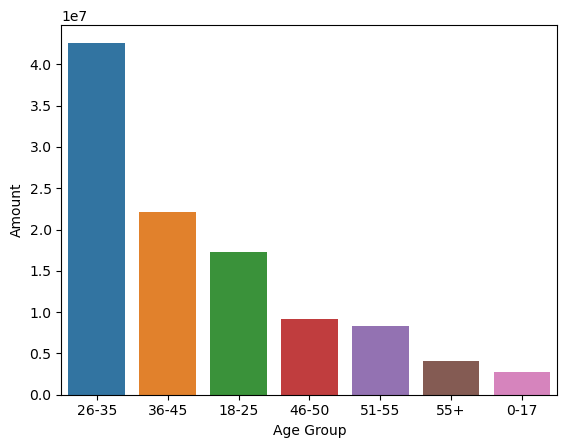

In [16]:
#Total Amount vs Age Group
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

###### from above graphs we can see that most of the buyers are of age group between 26-35 yrs female

### State

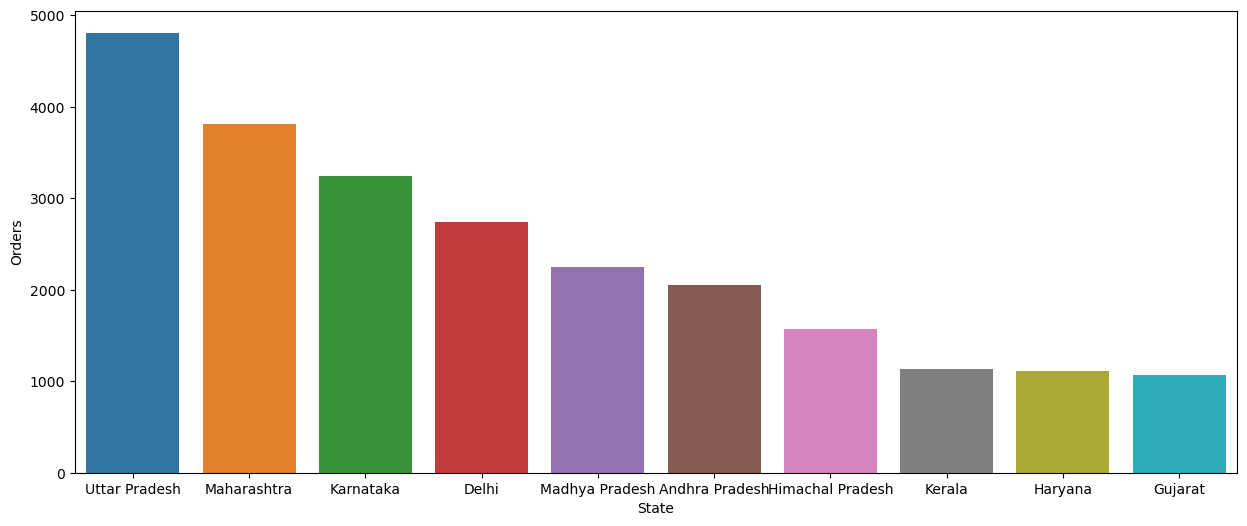

In [14]:
# Total number of Orders from 10 states
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(15,6))
sns.barplot(x='State',y='Orders',data=sales_state)
plt.show()

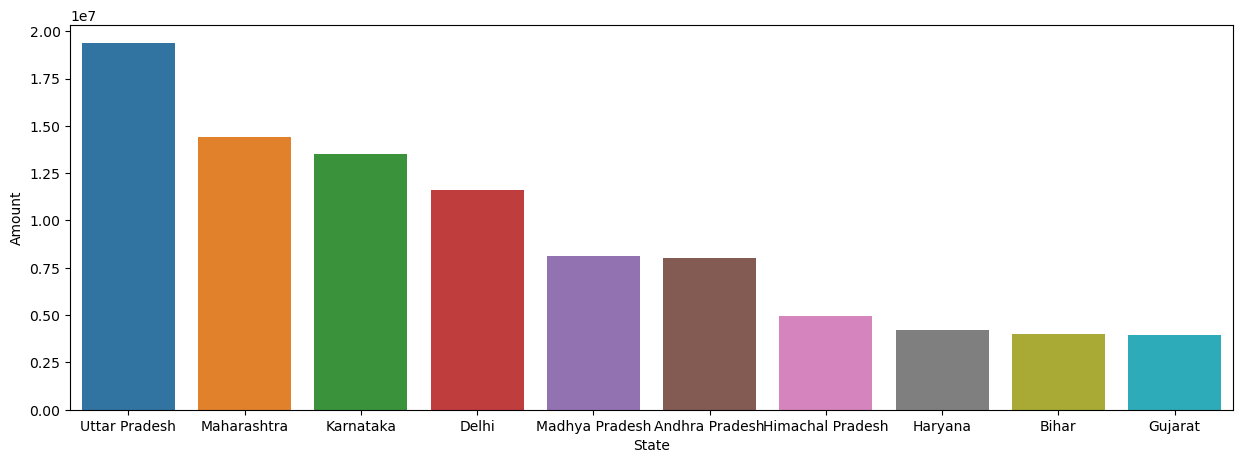

In [15]:
 #Total Amount/State from top 10 states
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x='State',y='Amount',data=sales_state)
plt.show()

#### from above graphs we can see that most of the order & total sales/amount are from Uttar Pradesh,Maharastra and Karnataka respectively

### Marital_Status

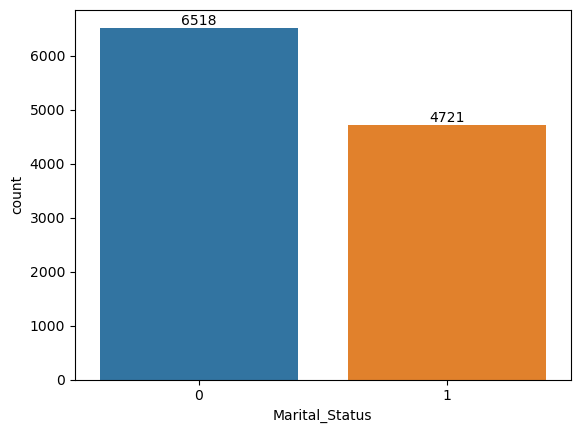

<Figure size 800x600 with 0 Axes>

In [17]:
ax=sns.countplot(data=df,x='Marital_Status')
plt.figure(figsize=(8,6))
ax.bar_label(ax.containers[0])
plt.show()

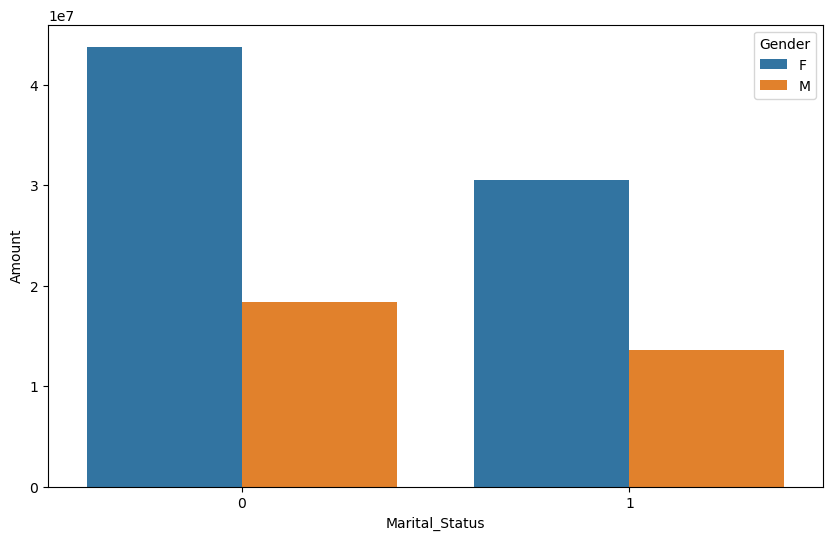

In [20]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')
plt.show()

#### from above graph we can see that most of the buyers are married(women) have high purchasing power

### Occupation

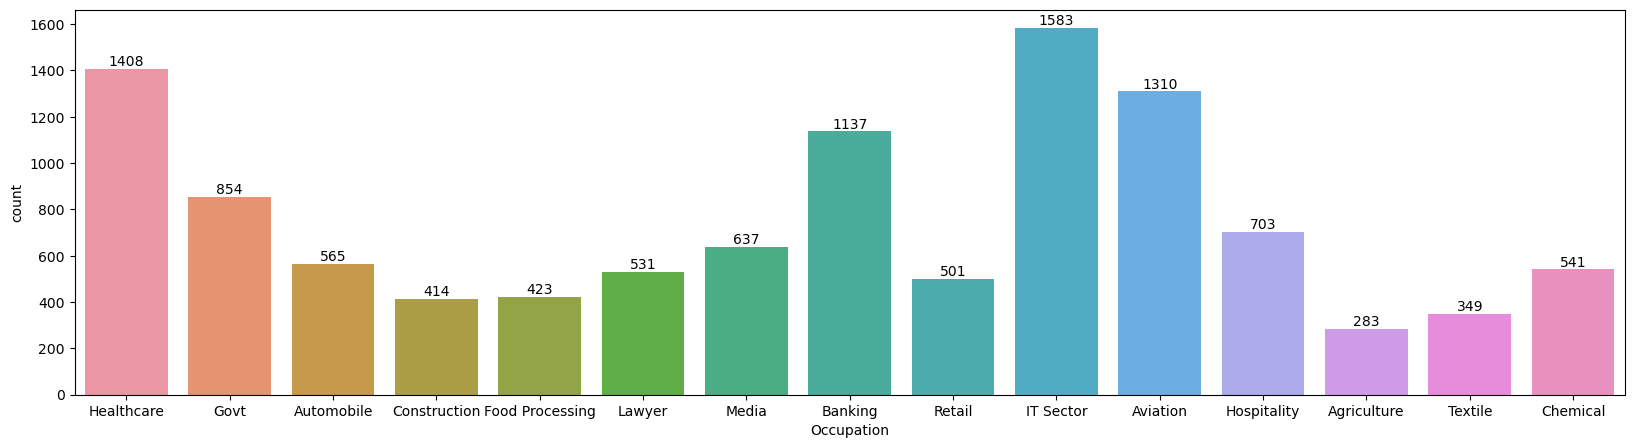

In [21]:
plt.figure(figsize=(20,5))
ax=sns.countplot(data=df,x='Occupation')
ax.bar_label(ax.containers[0])
plt.show()

<Axes: xlabel='Occupation', ylabel='Amount'>

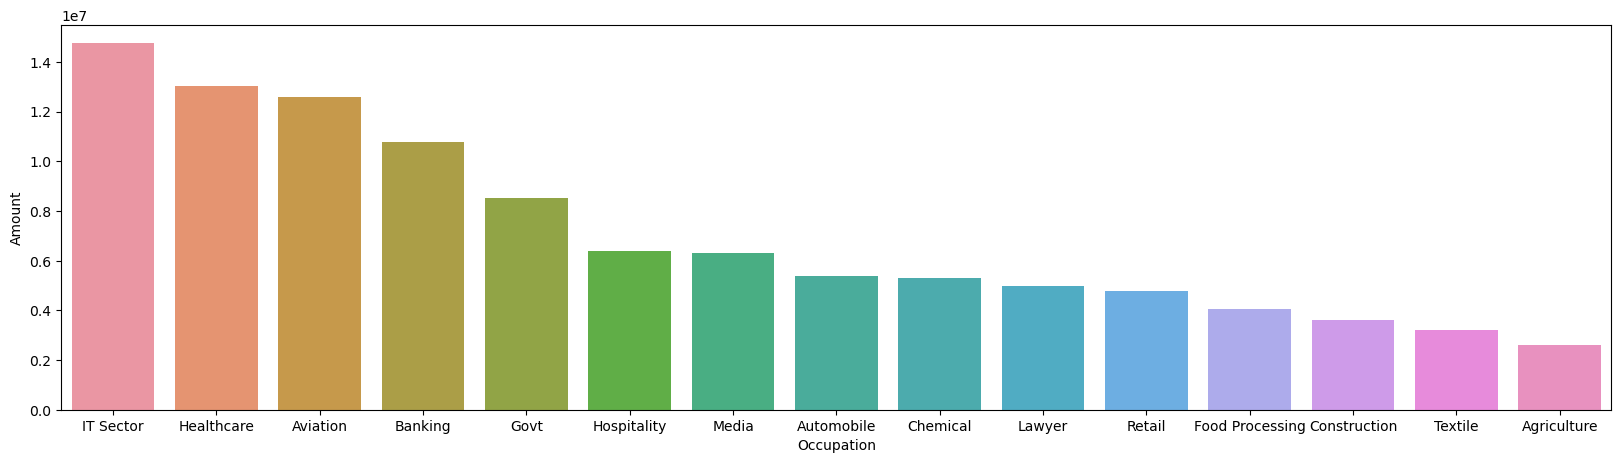

In [24]:
sales_state=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(data=sales_state,x='Occupation',y='Amount')

#### from above graphs we can see that most of the buyers are working in IT,Healthcare and Aviation sector

### Product Category

[Text(0, 0, '97'),
 Text(0, 0, '26'),
 Text(0, 0, '112'),
 Text(0, 0, '72'),
 Text(0, 0, '1059'),
 Text(0, 0, '352'),
 Text(0, 0, '2490'),
 Text(0, 0, '386'),
 Text(0, 0, '356'),
 Text(0, 0, '103'),
 Text(0, 0, '2087'),
 Text(0, 0, '96'),
 Text(0, 0, '2655'),
 Text(0, 0, '422'),
 Text(0, 0, '520'),
 Text(0, 0, '212'),
 Text(0, 0, '81'),
 Text(0, 0, '113')]

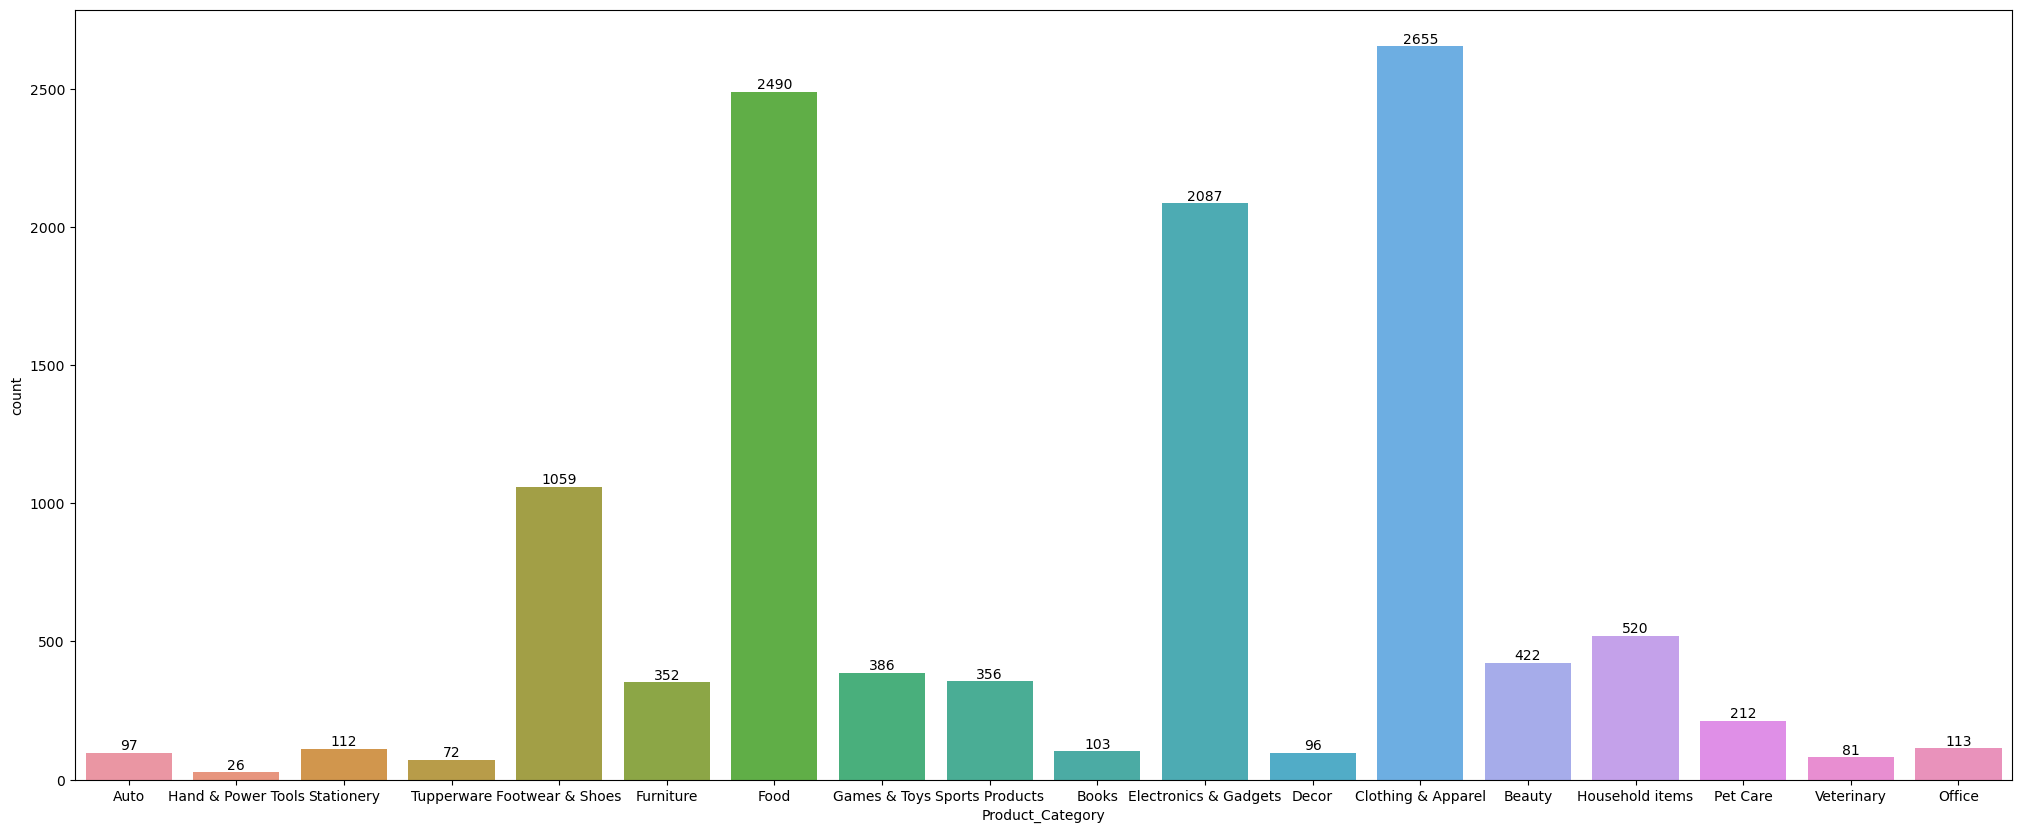

In [36]:
plt.figure(figsize=(25,10))
ax=sns.countplot(data=df,x='Product_Category')
ax.bar_label(ax.containers[0])

<Axes: xlabel='Product_Category', ylabel='Amount'>

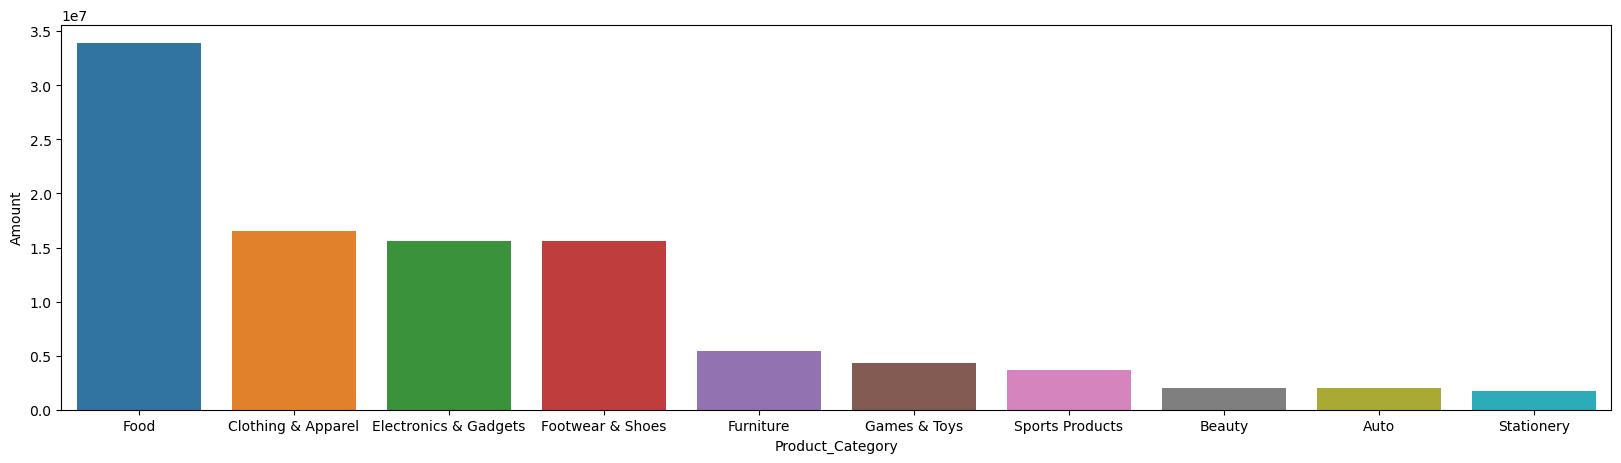

In [33]:
sales_state=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(20,5))
sns.barplot(data=sales_state,x='Product_Category',y='Amount')

#### from above graphs we can see that most of the sold products are from food,clothing and electronics category

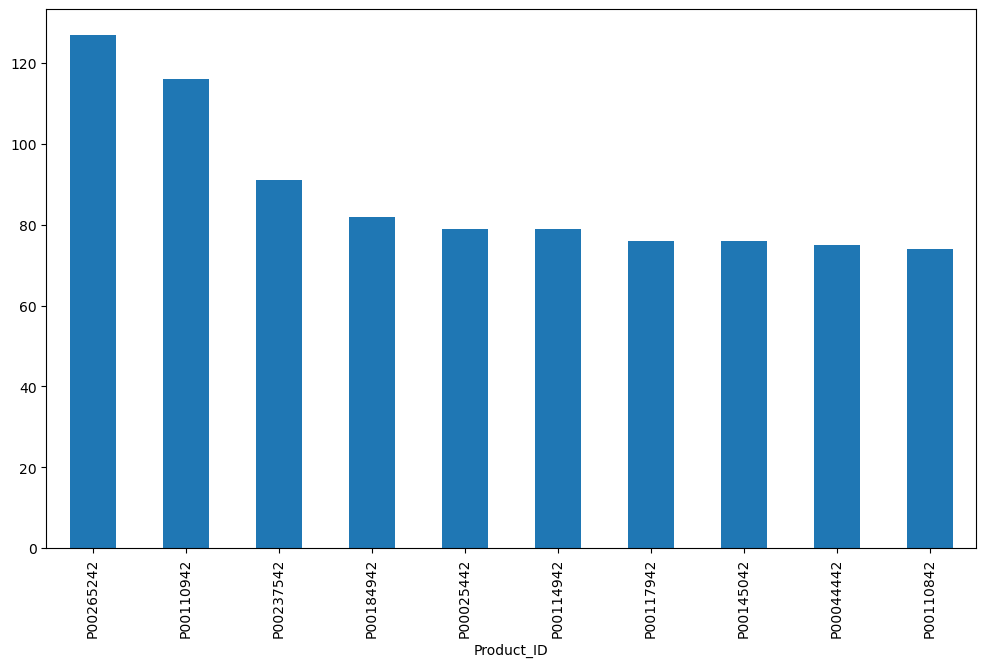

In [42]:
#top 10 most sold products
fig1,ax1=plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

### or

<Axes: xlabel='Product_ID', ylabel='Orders'>

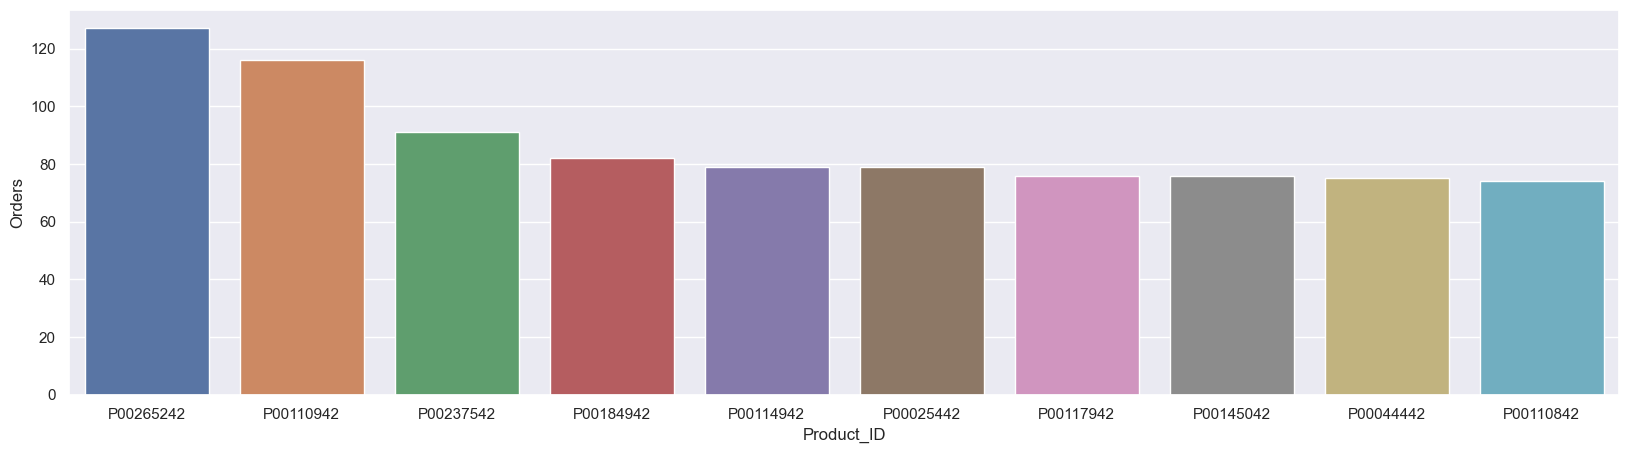

In [43]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

### conclusion

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category